# Trabalho de Novas Tecnologias em Bancos de Dados

## Data Warehouse para análise do mercado de imóveis

#### Fonte: QuintoAndar

#### Grupo: Guilherme Santos, Gustavo de Jesus e João Mesa

A gestão imobiliária é uma área que demanda grande volume de informações para subsidiar decisões estratégicas e operacionais. Esse segmento abrange atividades relacionadas à compra, venda, locação, avaliação e administração de imóveis, sendo essencial para indivíduos, empresas e investidores.
Nesse contexto, o uso de um Data Warehouse (DW) surge como uma solução tecnológica viável para consolidar e organizar os dados provenientes de diversas fontes, permitindo análises multidimensionais e uma visão mais completa do mercado. A proposta deste projeto é a criação de um protótipo de DW para a área de gestão imobiliária, utilizando como principal fonte de dados o website QuintoAndar (https://quintoandar.com.br). Esse site representa uma das plataformas mais utilizadas para anúncios e buscas de imóveis no Brasil, contendo informações sobre preços, localizações, características dos imóveis e tendências do mercado.
Com o DW, espera-se oferecer uma estrutura que possibilite aos gestores imobiliários realizar consultas avançadas, identificar padrões de comportamento dos consumidores, acompanhar flutuações nos preços dos imóveis e prever demandas futuras.

notebook disponível em: https://colab.research.google.com/drive/1vAWaOEHL9IuYDbtHi6Johz2AWJ9hf0qF?usp=sharing




## Apresentação do site

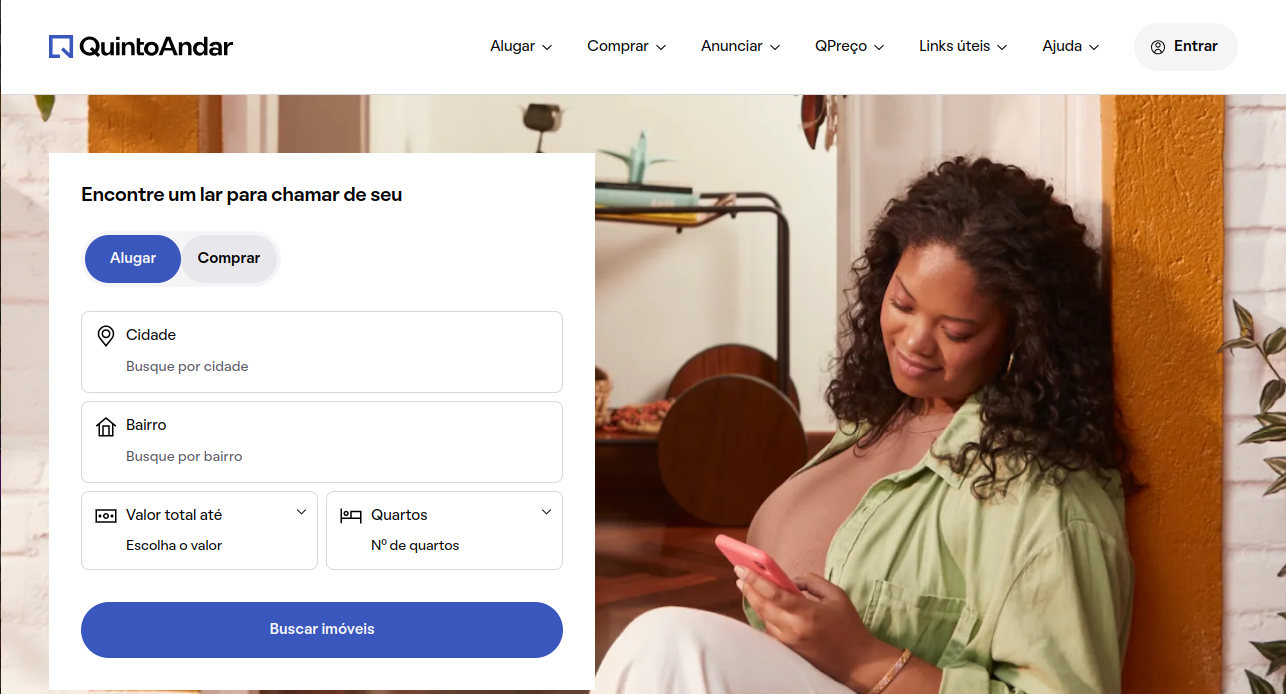

Diferente de outros sites do segmento, o QuintoAndar não permite que seja feita uma busca  em todos os locais possíveis. Quando não se especifica um local para o o imóvel, o site redireciona para a cidade de São Paulo, onde há o maior número de imóveis, portanto, é necessário fazer várias consultas, especificando na url qual cidade estaremos buscando.

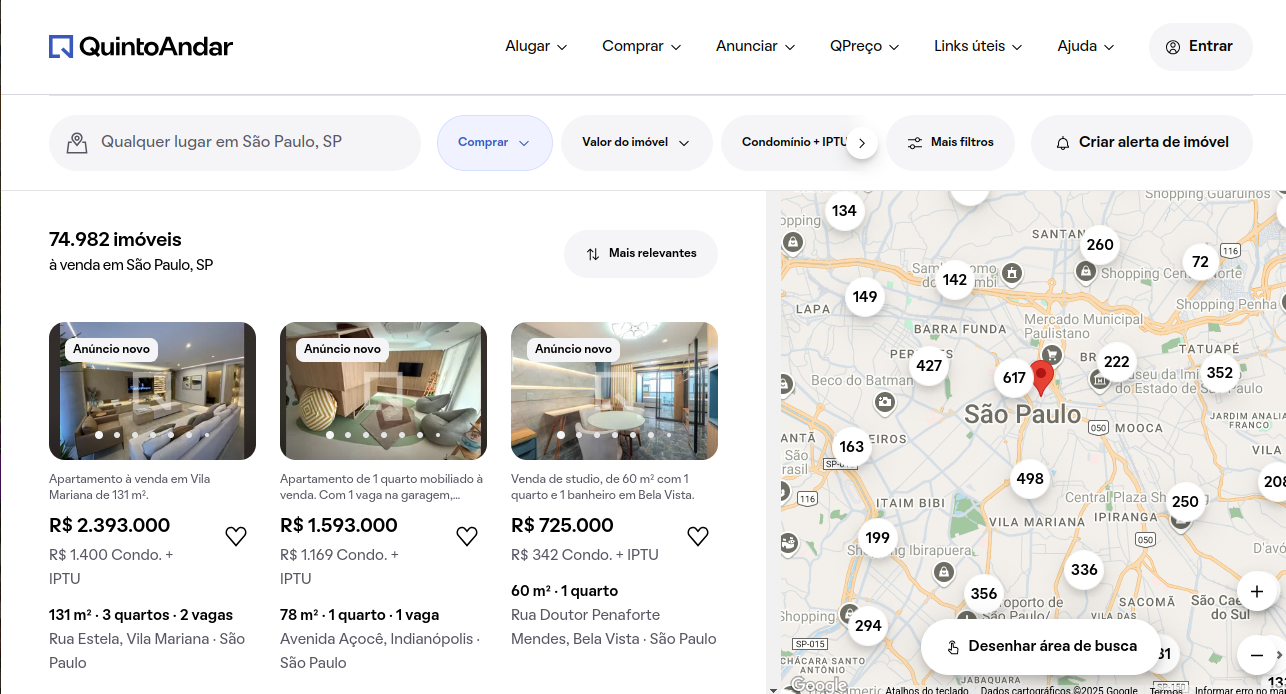

Algumas informações podem ser retiradas da chamada do anúncio do imóvel, como seu preço, seu bairro e a quantidade de quartos e vagas. Outras informações necessitam que entremos no anúncio em si para obtê-las, como os itens presentes no apartamento, presença de piscina, ar condicionado ou mobília específica.

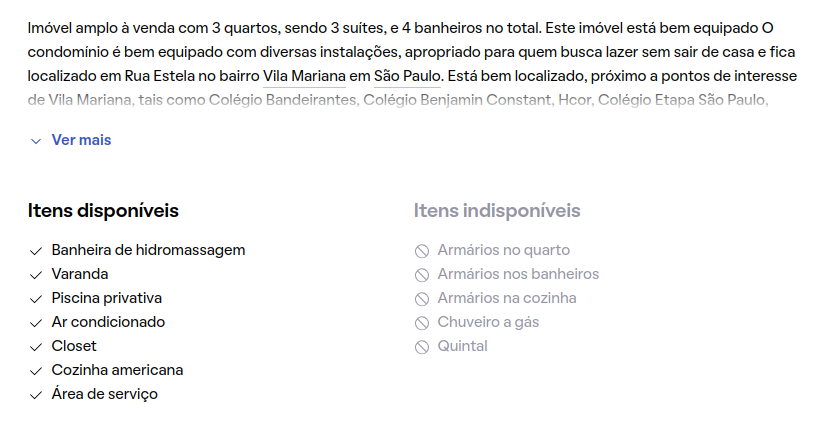

# ETL do Projeto

## 1. Mapeamento entre as Fontes e o Modelo Multidimensional

O processo ETL foi estruturado para extrair dados de imóveis disponíveis no site Quinto Andar, transformá-los conforme o modelo multidimensional definido, e carregá-los no Data Warehouse (DW). O modelo multidimensional adota a modelagem estrela, com a fato_vendas e dimensões como dim_tempo, dim_localizacao e dim_imovel.

Mapeamento das Fontes com o Modelo do DW:

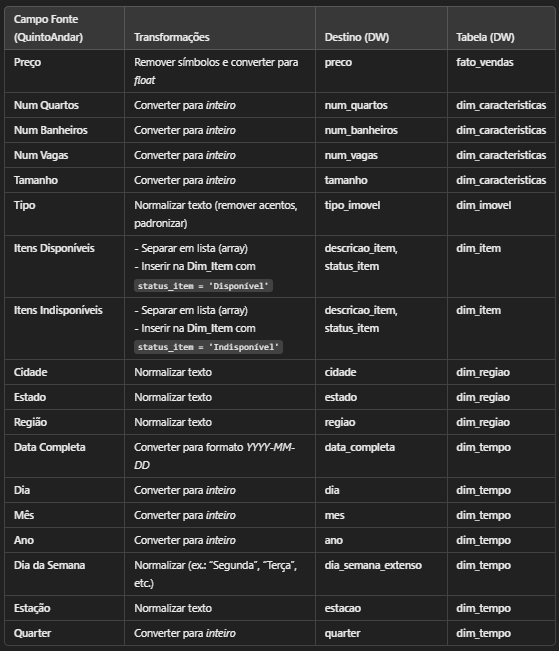

## 2. Desenvolvimento do Web Scraper (Extração)

Para a extração dos dados, foi desenvolvido um web scraper com Selenium que navega nas páginas de listagens de imóveis e coleta informações relevantes.

Passos da Extração:



1.   Inicializa o navegador em modo headless.
2.   Navega até a página do Quinto Andar e carrega as informações necessárias.
3.   Extrai dados como preço, localização, número de quartos, banheiros, vagas, tamanho, e itens disponíveis.
4.   Armazena os dados extraídos em um DataFrame temporário para transformação.

## 3. Staging Area (Área de Trabalho Temporária)

*   Remoção de inconsistências e dados faltantes.
*   Normalização de colunas e tipos de dados.
*   Conversão de listas em strings para arrays compatíveis com o PostgreSQL.

## 4. Transformações Realizadas

As transformações incluíram:



*   Limpeza de dados: Remoção de valores nulos e duplicados.
*   Conversão de tipos: Preço e tamanho convertidos para float, número de quartos/banheiros para int.
*   Normalização de strings: Remoção de espaços extras e formatação de datas.
*   Conversão de listas: Adaptação de strings para arrays compatíveis com PostgreSQL.

## 5. Carga no Data Warehouse (DW)

Após a transformação, os dados foram carregados no PostgreSQL com suporte a arrays.

## 6. Fluxograma Detalhado da ETL

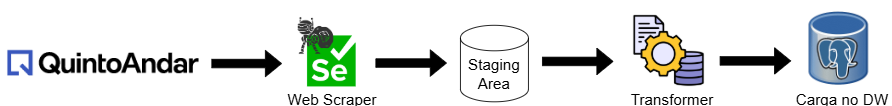


## Web Scrapping

#### Baixando e importando as bibliotecas

In [ ]:
!pip install sqlalchemy pandas selenium webdriver-manager beautifulsoup4 numpy requests dateparser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 9.9 MB/s eta 0:00:00


In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.dialects.postgresql import ARRAY, TEXT
from sqlalchemy import create_engine, text
import pandas as pd
import ast
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import datetime
from datetime import datetime
import calendar
import dateparser
from datetime import datetime
import unicodedata

#### Inicializa o Chrome webdriver para realizar o scraping

In [ ]:
# Configura as opções do Chrome
chrome_options = Options()

# Adiciona o argumento para rodar o Chrome em modo "headless" (sem interface gráfica)
chrome_options.add_argument("--headless")

# Desabilita a aceleração por GPU para evitar bugs gráficos no modo headless
chrome_options.add_argument("--disable-gpu")

# Define o tamanho da janela do navegador para garantir que a renderização seja feita corretamente
chrome_options.add_argument("--window-size=1920x1080")

# Configura o serviço do ChromeDriver, instalando automaticamente a versão correta do driver
service = Service(ChromeDriverManager().install())

# Inicializa o driver do Chrome com as opções e o serviço configurados
driver = webdriver.Chrome(service=service, options=chrome_options)

WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
#0 0x599eaf76c4e3 <unknown>
#1 0x599eaf49bc76 <unknown>
#2 0x599eaf4c2757 <unknown>
#3 0x599eaf4c1029 <unknown>
#4 0x599eaf4ffccc <unknown>
#5 0x599eaf4ff47f <unknown>
#6 0x599eaf4f6de3 <unknown>
#7 0x599eaf4cc2dd <unknown>
#8 0x599eaf4cd34e <unknown>
#9 0x599eaf72c3e4 <unknown>
#10 0x599eaf7303d7 <unknown>
#11 0x599eaf73ab20 <unknown>
#12 0x599eaf731023 <unknown>
#13 0x599eaf6ff1aa <unknown>
#14 0x599eaf7556b8 <unknown>
#15 0x599eaf755847 <unknown>
#16 0x599eaf765243 <unknown>
#17 0x7dcc4adddac3 <unknown>


#### Função que executa o scraping e funções auxiliares

In [ ]:
def executar_scraping(url, estado, n_cliques):
    # Navega até a URL fornecida
    driver.get(url)
    main_window = driver.current_window_handle

    # Aguarda alguns segundos para carregar o JavaScript (ajuste conforme necessário)
    time.sleep(2)

    # Clica no botão "Ver mais" várias vezes para carregar mais imóveis
    for i in range(n_cliques):
        try:
            see_more_button = WebDriverWait(driver, 1).until(
                EC.element_to_be_clickable((By.ID, "see-more"))
            )
            see_more_button.click()
        except:
            print('Botão de visualizar mais não encontrado')

    # Encontra todos os cards de imóveis na página
    cards = driver.find_elements(By.CLASS_NAME, "StyledLink_styledLink__P_6FN")

    # Listas para armazenar os dados extraídos
    precos = []
    num_quartos = []
    num_banheiros = []
    num_vagas = []
    m_quadrados = []
    tempos_publi = []
    itens_disponiveis = []
    itens_indisponiveis = []
    tipos_imoveis = []
    cidades = []
    regioes = []

    # Itera sobre cada card de imóvel para extrair informações detalhadas
    for i, card in enumerate(cards):
        href = card.get_attribute("href")

        # Faz uma requisição HTTP para obter o conteúdo da página do imóvel
        html = requests.get(href).content
        soup = BeautifulSoup(html, 'html.parser')

        # Extrai o preço do imóvel
        preco = soup.find('div', {'class': 'PriceTableSale_price__dexUu'})
        # Extrai as informações gerais do imóvel (quartos, banheiros, etc.)
        infos = soup.find_all('div', {'class': 'MuiBox-root mui-15au7ed'})
        # Extrai todos os spans da página (usados para cidade, região, etc.)
        spans = soup.find_all('span')
        # Extrai o tipo do imóvel (casa, apartamento, etc.)
        tipo_imovel = soup.find_all('h1')

        # Extrai os itens disponíveis e indisponíveis do imóvel
        itens = soup.find_all('div', {'class': 'MuiGrid-root MuiGrid-item MuiGrid-grid-xs-6 mui-1s50f5r'})

        # Tratamento para itens disponíveis e indisponíveis
        disponivel_aux = []
        indisponivel_aux = []

        try:
            itens_disponivels_pagina = itens[0].find_all('div', {'class': 'AmenitiesList_itemsWrapper__PLY3c'})
            for item in itens_disponivels_pagina:
                try:
                    disponivel_aux.append(item.text)
                except IndexError:
                    disponivel_aux.append(np.nan)
            itens_disponiveis.append(disponivel_aux)
        except IndexError:
            itens_disponiveis.append(np.nan)

        try:
            itens_indisponivels_pagina = itens[1].find_all('div', {'class': 'AmenitiesList_itemsWrapper__PLY3c'})
            for item in itens_indisponivels_pagina:
                try:
                    indisponivel_aux.append(item.text)
                except IndexError:
                    indisponivel_aux.append(np.nan)
            itens_indisponiveis.append(indisponivel_aux)
        except:
            itens_indisponiveis.append(np.nan)

        # Armazena o tipo do imóvel
        tipos_imoveis.append(tipo_imovel[0].text)

        # Extrai o tempo de publicação, cidade e região (baseado em índices fixos dos spans)
        tempos_publi.append(spans[106].text)
        cidades.append(spans[100].text)
        regioes.append(spans[101].text)

        # Armazena o preço do imóvel
        precos.append(preco.text)

        # Extrai e armazena informações como número de quartos, banheiros, etc.
        try:
            num_quartos.append(infos[0].text)
            m_quadrados.append(infos[1].text)
            num_vagas.append(infos[3].text)
            num_banheiros.append(infos[4].text)
        except IndexError:
            num_quartos.append(np.nan)
            m_quadrados.append(np.nan)
            num_vagas.append(np.nan)
            num_banheiros.append(np.nan)

    # Processamento adicional dos dados extraídos
    for i, tipo_imovel in enumerate(tipos_imoveis):
        tipo_imovel = str(tipo_imovel)
        tipos_imoveis[i] = tipo_imovel.split()[0]

    for i, quarto in enumerate(num_quartos):
        quarto = str(quarto)
        num_quartos[i] = quarto.split()[0]

    for i, tamanho in enumerate(m_quadrados):
        if isinstance(tamanho, str) and tamanho.strip():
            m_quadrados[i] = tamanho.split()[0]
        else:
            m_quadrados[i] = str(tamanho).split()[0]

    for i, vaga in enumerate(num_vagas):
        vaga = str(vaga)
        num_vagas[i] = vaga.split()[0]

        if num_vagas[i] == '-':
            num_vagas[i] = 0

    for i, banheiro in enumerate(num_banheiros):
        banheiro = str(banheiro)
        num_banheiros[i] = banheiro.split()[0]

    for i, preco in enumerate(precos):
        try:
            partes = preco.split('\xa0', 1)
            precos[i] = partes[1]
        except:
            precos[i] = np.nan

    # Função para converter o tempo de publicação em uma data legível
    def converter_para_data(data_string):
        data_string = data_string.replace('Publicado há', '').strip()
        data_convertida = dateparser.parse(data_string, settings={'PREFER_DATES_FROM': 'past'})
        if data_convertida:
            return data_convertida.strftime('%d/%m/%Y')
        else:
            return "Data inválida"

    datas_completas = [converter_para_data(data) for data in tempos_publi]

    # Função para extrair informações detalhadas da data (dia, mês, ano, etc.)
    def extrair_informacoes(data_string):
        try:
            data_convertida = datetime.strptime(data_string, '%d/%m/%Y')
        except:
            data_convertida = None

        if data_convertida is None:
            return {
                'Dia': None,
                'Mes': None,
                'Ano': None,
                'Dia da semana (número)': None,
                'Dia da semana (extenso)': None,
                'Semana do ano': None,
                'Quarter': None
            }

        dia = data_convertida.day
        mes = data_convertida.month
        ano = data_convertida.year
        dia_da_semana = data_convertida.weekday()
        dia_da_semana_extenso = [
            'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira',
            'Sexta-feira', 'Sábado', 'Domingo'
        ][dia_da_semana]
        semana_ano = data_convertida.isocalendar()[1]
        quarter = (mes - 1) // 3 + 1

        return {
            'Dia': dia,
            'Mes': mes,
            'Ano': ano,
            'Dia da semana (número)': dia_da_semana,
            'Dia da semana (extenso)': dia_da_semana_extenso,
            'Semana do ano': semana_ano,
            'Quarter': f'Q{quarter}'
        }

    # Listas para armazenar informações detalhadas da data
    dia = []
    mes = []
    ano = []
    dia_da_semana = []
    dia_da_semana_extenso = []
    semana_do_ano = []
    quarter = []

    for data in datas_completas:
        informacoes = extrair_informacoes(data)
        dia.append(informacoes['Dia'])
        mes.append(informacoes['Mes'])
        ano.append(informacoes['Ano'])
        dia_da_semana.append(informacoes['Dia da semana (número)'])
        dia_da_semana_extenso.append(informacoes['Dia da semana (extenso)'])
        semana_do_ano.append(informacoes['Semana do ano'])
        quarter.append(f'{informacoes["Quarter"]}')

    # Cria um DataFrame com todos os dados coletados
    dados = pd.DataFrame({'Preco': precos})
    dados['Num Quartos'] = num_quartos
    dados['Num Banheiros'] = num_banheiros
    dados['Num Vagas'] = num_vagas
    dados['Tamanho'] = m_quadrados
    dados['Tipo'] = tipos_imoveis
    dados['Cidade'] = cidades
    dados['Regiao'] = regioes
    dados['Itens Disponivels'] = itens_disponiveis
    dados['Itens Indisponíveis'] = itens_indisponiveis
    dados['Data Completa'] = datas_completas
    dados['Dia'] = dia
    dados['Mes'] = mes
    dados['Ano'] = ano
    dados['Dia da Semana'] = dia_da_semana
    dados['Dia da Semana Extenso'] = dia_da_semana_extenso
    dados['Semana do Ano'] = semana_do_ano
    dados['Quarter'] = quarter
    dados['Estado'] = estado

    # Tenta adicionar os novos dados a um arquivo CSV existente
    try:
        csv = pd.read_csv('quintoAndar.csv')
        result = pd.concat([csv, dados], ignore_index=True)
        result.to_csv('quintoAndar.csv', index=False)
        print(f'Dados de {url} coletados')
    except:
        # Se o arquivo não existir, cria um novo arquivo CSV
        dados.to_csv('quintoAndar.csv')
        print("Arquivo não encontrado. Criando um novo arquivo CSV.")

: 

#### Tratando e padronizando os dados antes de popular o DW

In [ ]:
def remove_accents(text):
    """
    Remove acentos de uma string, se ela for do tipo str.
    """
    if isinstance(text, str):
        nfkd_form = unicodedata.normalize('NFKD', text)
        return "".join([c for c in nfkd_form if not unicodedata.combining(c)])
    return text

def trata_dados_csv(df, output_file):
    """
    Lê um arquivo CSV, realiza transformações nos dados e salva o resultado em outro CSV.

    Transformações realizadas:
      - Remove colunas cujo nome inicia com "Unnamed".
      - Remove acentos dos textos.
      - Converte textos para letras minúsculas.
      - Remove linhas com valores nulos.
      - Remove caracteres especiais: ( ) [ ] { }.
    """
    # Remove colunas "Unnamed"
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Aplica a remoção de acentos para colunas de texto
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].apply(remove_accents)

    # Converte todos os textos para minúsculo
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.lower()

    # Remove linhas com valores nulos
    df.dropna(inplace=True)

    # Remove caracteres especiais: ( ) [ ] { }
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.replace(r"[()\[\]{}]", "", regex=True)

    # Remove anuncios repetidos que apenas alteram o preco
    cols_para_verificar = df.columns.difference(['Preco']).tolist()

    # Remover duplicatas, mantendo a primeira ocorrência
    df = df.drop_duplicates(subset=cols_para_verificar, keep='first')

    # Salva o DataFrame processado em um novo CSV
    df.to_csv(output_file, index=False)



: 

#### Especificando os links de cada cidade que estará sendo feito o scraping, e chamando a função para cada link

In [ ]:
# Lista de links para diferentes cidades no site Quinto Andar
links = [
    'https://www.quintoandar.com.br/comprar/imovel/belo-horizonte-mg-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/sao-paulo-sp-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/guarulhos-sp-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/rio-de-janeiro-rj-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/niteroi-rj-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/campinas-sp-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/sao-bernardo-do-campo-sp-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/osasco-sp-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/sao-goncalo-rj-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/duque-de-caxias-rj-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/belford-roxo-rj-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/canoas-rs-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/porto-alegre-rs-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/jundiai-sp-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/novo-hamburgo-rs-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/sao-leopoldo-rs-brasil',
    'https://www.quintoandar.com.br/comprar/imovel/contagem-mg-brasil'
]

# Lista de estados correspondentes aos links acima
estados = ['MG', 'SP', 'SP', 'RJ', 'RJ', 'SP', 'SP', 'SP', 'RJ', 'RJ', 'RJ', 'RS', 'RS', 'SP', 'RS', 'RS', 'MG']

# Itera sobre os links e estados para executar o scraping
for i in range(len(links)):
    # Chama a função `executar_scraping` para cada link e estado, com 50 cliques no botão "Ver mais"
    executar_scraping(links[i], estados[i], 50)

# Lê o arquivo CSV gerado pelo scraping
df = pd.read_csv('quintoAndar.csv')

# Remove a coluna 'Unnamed: 0' (gerada automaticamente ao salvar o DataFrame)
df = df.drop(columns=['Unnamed: 0'])

# Remove duplicatas do DataFrame
df = df.drop_duplicates()

# Aplica uma função para tratar os dados e salvar em um novo arquivo CSV
trata_dados_csv(df, 'quintoAndarTratado.csv')

# Encerra o driver do navegador
driver.quit()

## Criando o DW

#### Configurações do postgres, é necessário criar o DB com o nome Trabalho-DW e especificar o usuário e senha

In [ ]:
USER = "postgres"
PASSWORD = "#####"
HOST = "127.0.0.1"
PORT = "5432"
DB_NAME = "Trabalho-DW"
engine = create_engine(f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}")

#### Convertendo os valores para float

In [ ]:
df = pd.read_csv("../quintoAndarTratado.csv")

# Passo 1: Remover os pontos que separam os milhares
df['Preco'] = df['Preco'].str.replace('.', '', regex=False)

# Passo 2: Substituir a vírgula por ponto para o separador decimal
df['Preco'] = df['Preco'].str.replace(',', '.', regex=False)

# Passo 3: Converter para float
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

#### Criando a tabela de dados gerais, que será usada para popular o DW

In [ ]:
# Comando SQL para criar a tabela
create_table_query = """
CREATE TABLE IF NOT EXISTS dados_gerais (
    id SERIAL PRIMARY KEY,
    preco FLOAT,
    num_quartos INT,
    num_banheiros INT,
    num_vagas INT,
    tamanho FLOAT,
    tipo TEXT,
    cidade TEXT,
    regiao TEXT,
    itens_disponiveis TEXT[],
    itens_indisponiveis TEXT[],
    data_completa TEXT,
    dia INT,
    mes INT,
    ano INT,
    dia_da_semana INT,
    dia_da_semana_extenso TEXT,
    semana_do_ano INT,
    quarter TEXT,
    estado TEXT
);
"""

# Executa o comando SQL para criar a tabela
with engine.connect() as connection:
    connection.execute(text(create_table_query))

print("Tabela 'dados_gerais' criada com sucesso!")

#### Adaptando os dados para o postgres

In [ ]:
# Função para adaptar os itens para o postgres suportar
def convert_string_to_list(x):
    if isinstance(x, str):
        x = x.strip()
        if not x.startswith('['):
            x = '[' + x + ']'
        try:
            lista = ast.literal_eval(x)
            return [str(item).strip() for item in lista]
        except Exception:
            items = x.strip('[]').split(',')
            return [item.strip(" '\"") for item in items if item.strip(" '\"")]
    return []


# Renomeia as colunas para igualar aos da tabela
df.rename(columns={
    "Preco": "preco",
    "Num Quartos": "num_quartos",
    "Num Banheiros": "num_banheiros",
    "Num Vagas": "num_vagas",
    "Tamanho": "tamanho",
    "Tipo": "tipo",
    "Cidade": "cidade",
    "Regiao": "regiao",
    "Data Completa": "data_completa",
    "Dia": "dia",
    "Mes": "mes",
    "Ano": "ano",
    "Dia da Semana": "dia_da_semana",
    "Dia da Semana Extenso": "dia_da_semana_extenso",
    "Semana do Ano": "semana_do_ano",
    "Quarter": "quarter",
    "Estado": "estado",
    "Itens Disponivels": "itens_disponiveis",
    "Itens Indisponíveis": "itens_indisponiveis"
}, inplace=True)

# Aplica a conversão nas colunas de itens
df["itens_disponiveis"] = df["itens_disponiveis"].apply(convert_string_to_list)
df["itens_indisponiveis"] = df["itens_indisponiveis"].apply(convert_string_to_list)

# Mapeamento de tipos para as colunas que são arrays
dtype_mapping = {
    "itens_disponiveis": ARRAY(TEXT),
    "itens_indisponiveis": ARRAY(TEXT)
}

# Insere os dados na tabela
df.to_sql("dados_gerais", engine, if_exists="append", index=False, dtype=dtype_mapping)



# Esquema do DW

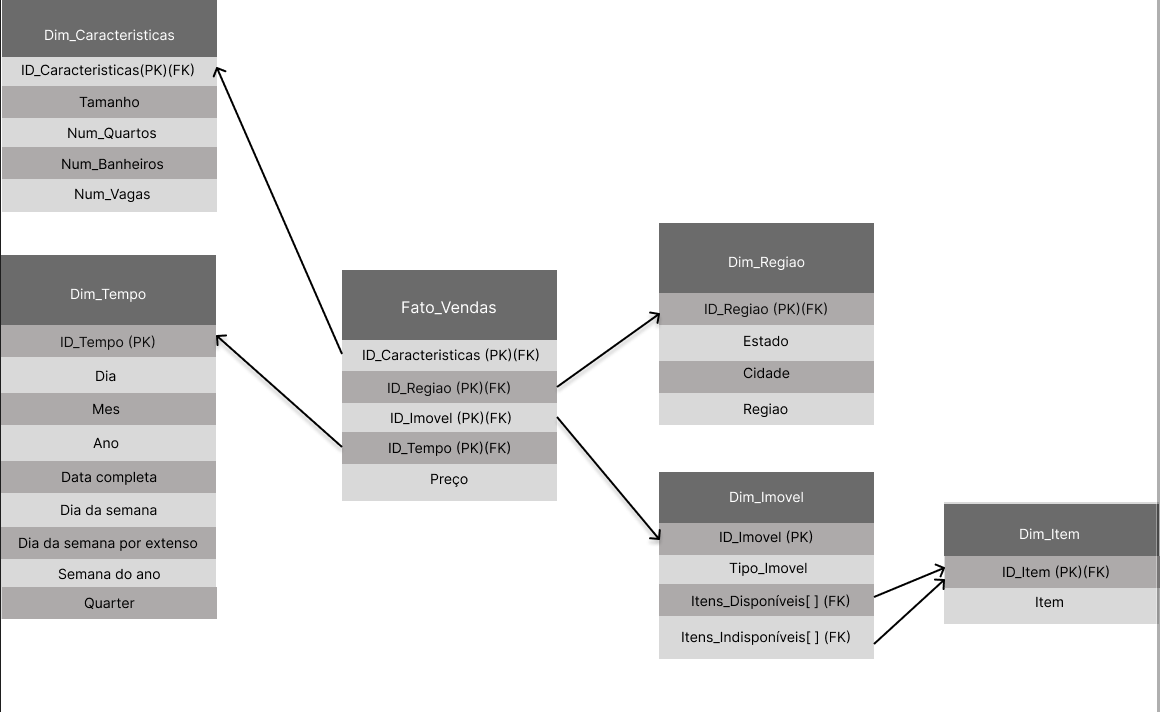

## Comandos SQL para criar e popular o DW


```
--
-- Dimensao tempo
--

CREATE TABLE dimensao_tempo (
    id_tempo SERIAL PRIMARY KEY,
    dia INT,
    mes INT,
    Ano INT,
    data_completa TEXT,
    dia_da_semana INT,
    dia_da_semana_extenso TEXT,
    semana_do_ano INT,
    quarter TEXT
);


--
-- Popula tempo
--

INSERT INTO dimensao_tempo (
    dia,
    mes,
    ano,
    data_completa,
    dia_da_semana,
    dia_da_semana_extenso,
    semana_do_ano,
    quarter
)
SELECT
    dia,
    mes,
    ano,
    data_completa,
    dia_da_semana,
    dia_da_semana_extenso,
    semana_do_ano,
    quarter
FROM dados_gerais
GROUP BY
    dia, mes, ano, data_completa,
    dia_da_semana, dia_da_semana_extenso,
    semana_do_ano, quarter;


--
-- dimensao regiao
--

CREATE TABLE dimensao_regiao (
	id_regiao SERIAL PRIMARY KEY,
	estado TEXT,
	cidade TEXT,
	regiao TEXT
)


--
-- Popular regiao
--

INSERT INTO dimensao_regiao (estado, cidade, regiao)
SELECT estado, cidade, regiao
FROM dados_gerais
GROUP BY estado, cidade, regiao;


--
-- Dimensao item
--

CREATE TABLE dimensao_item (
	id_item SERIAL PRIMARY KEY,
	item TEXT
)


--
-- popular item
--


INSERT INTO dimensao_item (item)
SELECT DISTINCT item
FROM (
    SELECT unnest(itens_disponiveis) AS item
    FROM dados_gerais
    UNION
    SELECT unnest(itens_indisponiveis) AS item
    FROM dados_gerais
) AS todos_itens;


--
-- dimensao imovel
--

CREATE TABLE dimensao_imovel (
	id_imovel SERIAL PRIMARY KEY,
	tipo TEXT,
	itens_disponiveis INT[] NOT NULL,
	itens_indisponiveis INT[] NOT NULL
)


--
-- popular imovel
--

INSERT INTO dimensao_imovel (tipo, itens_disponiveis, itens_indisponiveis)
SELECT DISTINCT
    dg.tipo,
    ARRAY(
        SELECT id_item
        FROM dimensao_item
        WHERE item = ANY(dg.itens_disponiveis)
    ),
    ARRAY(
        SELECT id_item
        FROM dimensao_item
        WHERE id_item NOT IN (
            SELECT id_item
            FROM dimensao_item
            WHERE item = ANY(dg.itens_disponiveis)
        )
    )
FROM dados_gerais dg;


--
-- dimensao caracteristicas
--

CREATE TABLE dimensao_caracteristicas (
	id_caracteristicas SERIAL PRIMARY KEY,
	tamanho float,
	num_quartos int,
	num_banheiros int,
	num_vagas int
)


--
-- popula caracteristicas
--

INSERT INTO dimensao_caracteristicas (tamanho, num_quartos, num_banheiros, num_vagas)
SELECT DISTINCT
    dg.tamanho::FLOAT,
    dg.num_quartos,
    dg.num_banheiros,
    dg.num_vagas
FROM dados_gerais dg;


--
-- tabela fato
--

CREATE TABLE fato_vendas (
    id_regiao INT NOT NULL,
    id_imovel INT NOT NULL,
    id_tempo INT NOT NULL,
    id_caracteristicas INT NOT NULL,
    preco NUMERIC(10,2),  -- Usando um tipo adequado para valores monetários

    -- Definição de chaves estrangeiras
    FOREIGN KEY (id_regiao) REFERENCES dimensao_regiao(id_regiao),
    FOREIGN KEY (id_tempo) REFERENCES dimensao_tempo(id_tempo),
    FOREIGN KEY (id_imovel) REFERENCES dimensao_imovel(id_imovel),
    FOREIGN KEY (id_caracteristicas) REFERENCES dimensao_caracteristicas(id_caracteristicas),

    -- Chave primária composta para garantir unicidade
    PRIMARY KEY (id_regiao, id_imovel, id_tempo, id_caracteristicas)
);


--
-- popula vendas
--

INSERT INTO fato_vendas (
    id_regiao,
    id_imovel,
    id_tempo,
    id_caracteristicas,
    preco
)
SELECT
    dr.id_regiao,
    di.id_imovel,
    dt.id_tempo,
    dc.id_caracteristicas,
    dg.preco::NUMERIC(10,2)
FROM
    dados_gerais dg
INNER JOIN dimensao_regiao dr
    ON dg.estado = dr.estado
    AND dg.cidade = dr.cidade
    AND dg.regiao = dr.regiao
INNER JOIN dimensao_tempo dt
    ON dg.data_completa = dt.data_completa
INNER JOIN dimensao_imovel di
    ON dg.tipo = di.tipo
    AND (
         SELECT ARRAY(
             SELECT id_item
             FROM dimensao_item
             WHERE item = ANY(dg.itens_disponiveis)
             ORDER BY id_item
         )
    ) = (
         SELECT ARRAY(
             SELECT unnest(di.itens_disponiveis)
             ORDER BY 1
         )
    )
INNER JOIN dimensao_caracteristicas dc
    ON dg.tamanho::FLOAT = dc.tamanho
    AND dg.num_quartos = dc.num_quartos
    AND dg.num_banheiros = dc.num_banheiros
    AND dg.num_vagas = dc.num_vagas
```

## Consultas SQL

#### 1. Preço médio dos imóveis por região e cidade (com 2 casas decimais)

In [ ]:
SELECT
    dr.estado,
    dr.cidade,
    dr.regiao,
    ROUND(AVG(fv.preco), 2) AS preco_medio
FROM fato_vendas fv
INNER JOIN dimensao_regiao dr ON fv.id_regiao = dr.id_regiao
GROUP BY dr.estado, dr.cidade, dr.regiao;

Resposta (reduzida) da consulta:

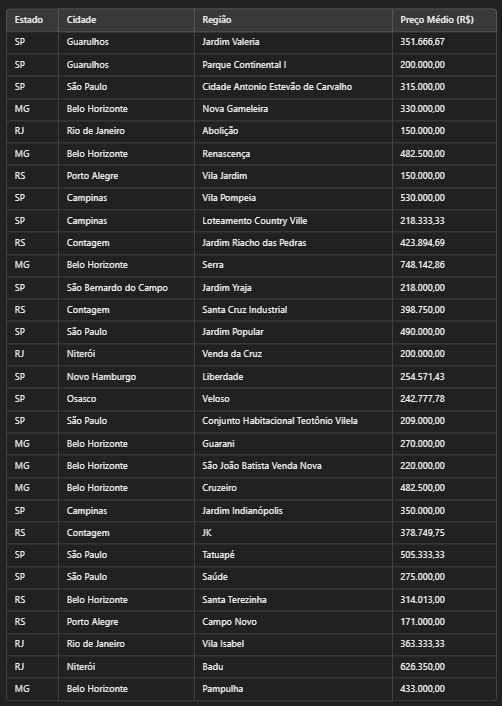

Os dados da tabela mostram o preço médio dos imóveis em diferentes estados, cidades e regiões do Brasil, destacando variações significativas entre localidades.

Belo Horizonte MG apresenta bairros com preços elevados, como Serra e Cruzeiro, indicando áreas valorizadas, enquanto regiões como Guarani mostram preços mais acessíveis.

Em São Paulo SP, bairros como Vila Pompeia em Campinas e Tatuapé na capital  apresentam valores altos, sugerindo regiões com alta demanda e infraestrutura consolidada.

No Rio de Janeiro RJ, destaca-se o bairro Badu em Niterói, enquanto áreas como Abolição oferecem preços mais baixos.

Porto Alegre RS e Contagem RS têm preços médios variados, evidenciando disparidades até mesmo dentro de uma mesma cidade.

Essa variação reflete fatores como localização, infraestrutura, segurança e oferta de serviços, sendo essencial para análises de mercado, planejamento de investimentos e definição de estratégias imobiliárias.


###Gráficos de preço médio por cidade, estado e região

Por estado

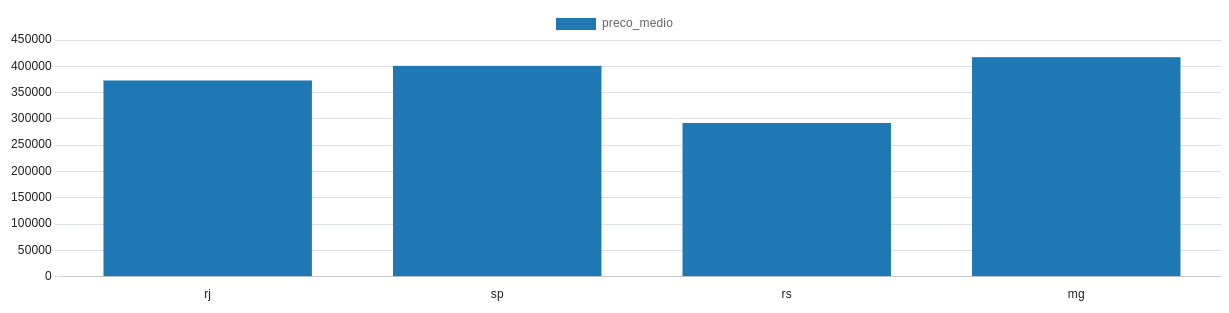

Por cidade

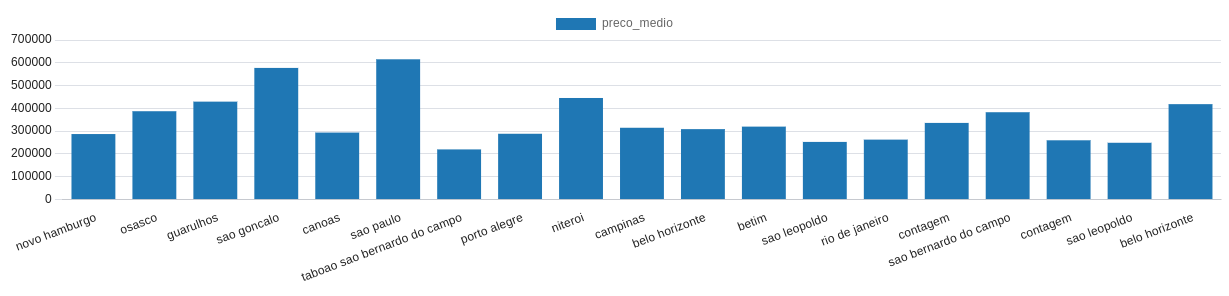

Por região (reduzido)

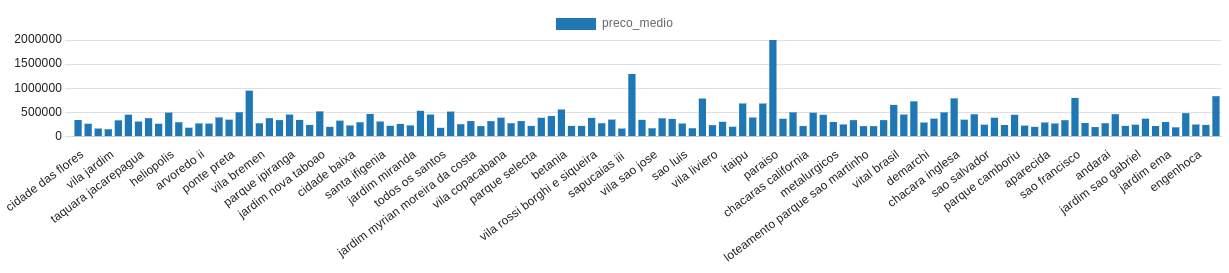

#### 2. Variação do preço conforme número de quartos, banheiros e vagas

In [ ]:
SELECT
    dc.num_quartos,
    dc.num_banheiros,
    dc.num_vagas,
    ROUND(AVG(fv.preco), 2) AS preco_medio
FROM fato_vendas fv
INNER JOIN dimensao_caracteristicas dc ON fv.id_caracteristicas = dc.id_caracteristicas
GROUP BY dc.num_quartos, dc.num_banheiros, dc.num_vagas
ORDER BY dc.num_quartos, dc.num_banheiros, dc.num_vagas;

Resposta (reduzida) da consulta:

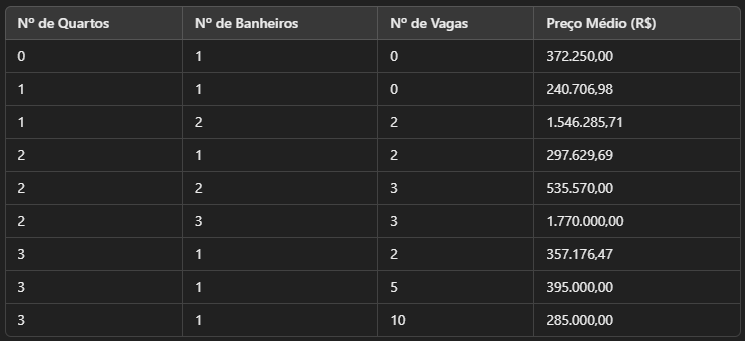

Os dados destacam a relação entre o número de quartos, banheiros e vagas com o preço médio dos imóveis. Imóveis com maior número de banheiros e vagas, mesmo com poucos quartos, tendem a ser mais caros, como o de 1 quarto, 2 banheiros e 2 vagas e o de 2 quartos, 3 banheiros e 3 vagas, evidenciando a valorização pelo conforto e infraestrutura.

Por outro lado, imóveis com 3 quartos e muitas vagas nem sempre ultrapassam os preços mais elevados, sugerindo que fatores como localização e padrão de construção também influenciam.

Já opções mais simples, como 1 quarto, 1 banheiro e 0 vagas, são mais acessíveis, atendendo a perfis que buscam custo-benefício. Esses dados permitem análises estratégicas para compradores, investidores e o mercado imobiliário em geral.

### Gráficos por número de banheiros, quartos e vagas

Por vagas

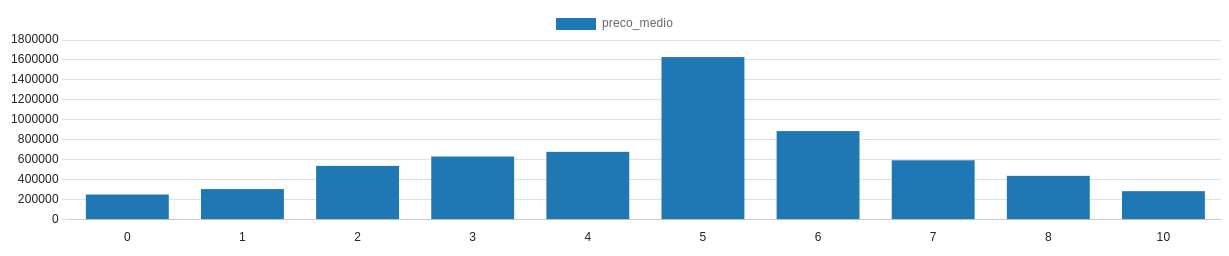

Por banheiros

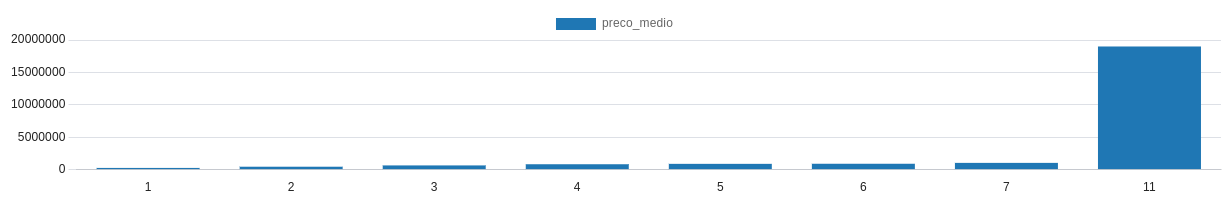

Por quartos

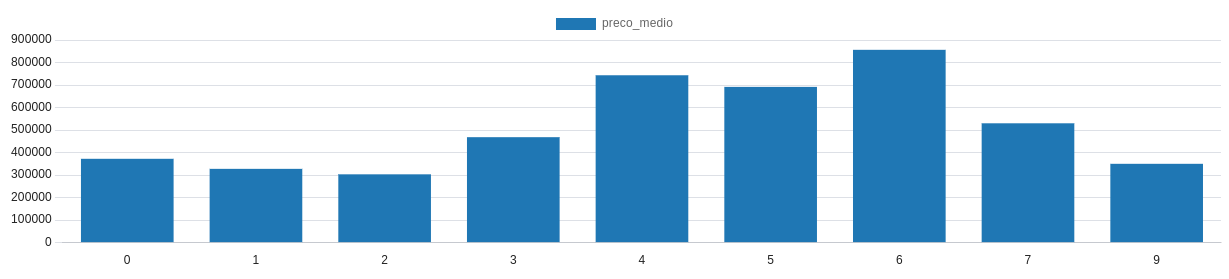

#### 3. Regiões com maior oferta de imóveis

In [ ]:
SELECT
    dr.estado,
    dr.cidade,
    dr.regiao,
    COUNT(*) AS total_imoveis
FROM fato_vendas fv
INNER JOIN dimensao_regiao dr ON fv.id_regiao = dr.id_regiao
GROUP BY dr.estado, dr.cidade, dr.regiao
ORDER BY total_imoveis DESC;

Resposta (reduzida) da consulta:

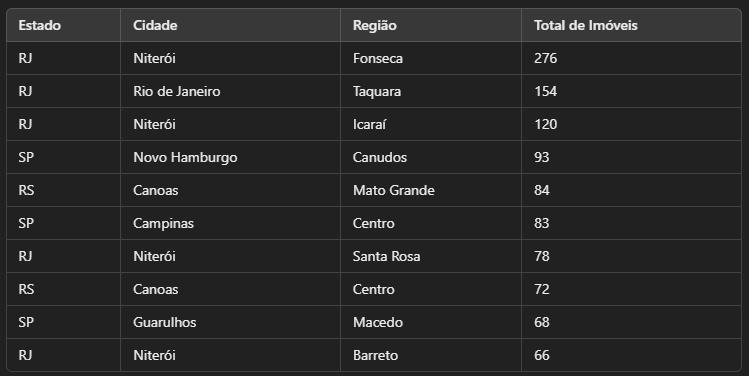

Os dados mostram a concentração de imóveis disponíveis em diferentes regiões. Niterói (RJ) se destaca com três bairros entre os mais ofertados, especialmente o Fonseca com 276 imóveis, indicando alta disponibilidade e provável procura na região. Rio de Janeiro (RJ) e Novo Hamburgo (SP) também aparecem com múltiplas regiões na lista, sugerindo mercados ativos. Bairros centrais como o Centro de Campinas (SP) e Centro de Canoas (RS) apresentam uma oferta significativa, reforçando que áreas centrais tendem a concentrar mais imóveis devido à maior demanda por acessibilidade e infraestrutura. Esse panorama é útil para entender dinâmicas de oferta no mercado imobiliário e pode ajudar compradores e investidores a identificar regiões com maior variedade de opções.

### Gráfico por Região

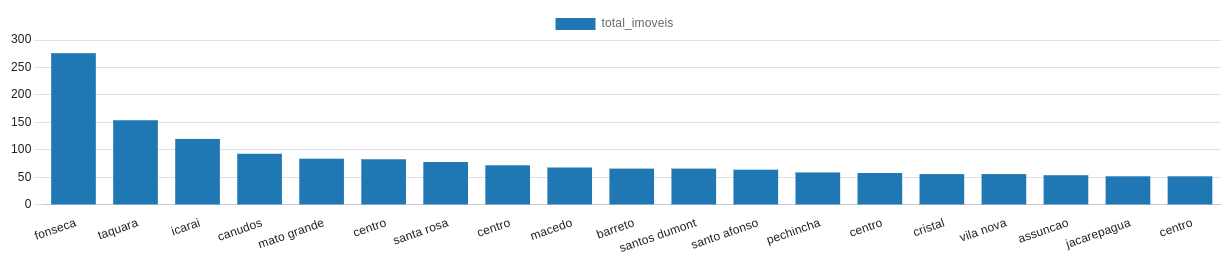

#### 4. Preço médio dos imóveis por tipo de imóvel

In [ ]:
SELECT
    di.tipo,
    COUNT(*) AS total_vendas,
    ROUND(AVG(fv.preco), 2) AS preco_medio
FROM fato_vendas fv
INNER JOIN dimensao_imovel di ON fv.id_imovel = di.id_imovel
GROUP BY di.tipo
ORDER BY di.tipo;

Grafico com dados retornados da consulta:

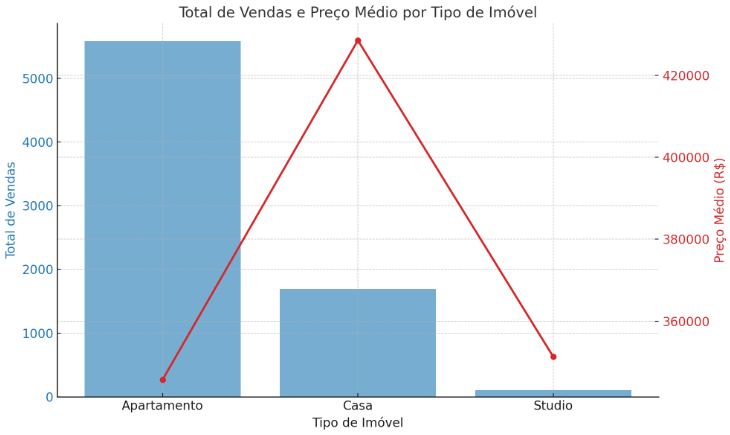

O gráfico mostra o total de vendas (barras azuis) e o preço médio (linha vermelha) para cada tipo de imóvel. É possível notar que apartamentos lideram em vendas, enquanto as casas apresentam o maior preço médio. Por outro lado, os studios têm vendas significativamente menores, com preço médio próximo ao dos apartamentos.

#### 5. Tamanho médio dos imóveis por número de quartos

In [ ]:
SELECT
    dc.num_quartos,
    COUNT(*) AS total_imoveis,
    ROUND(AVG(dc.tamanho)::numeric, 2) AS tamanho_medio
FROM fato_vendas fv
INNER JOIN dimensao_caracteristicas dc
    ON fv.id_caracteristicas = dc.id_caracteristicas
GROUP BY dc.num_quartos
ORDER BY dc.num_quartos;


Gráfico com dados retornados da consulta:

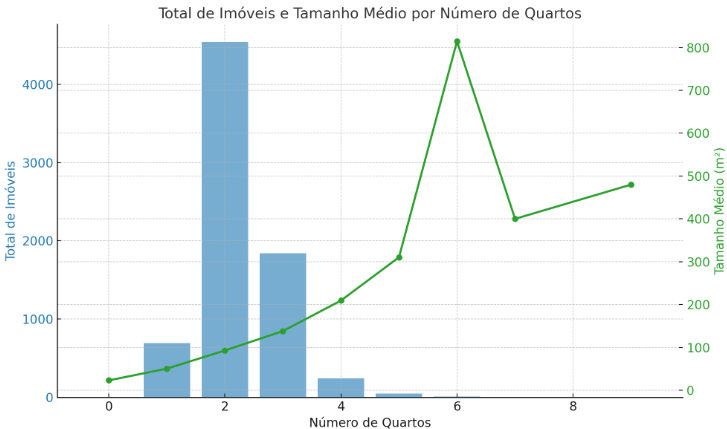

O gráfico relaciona o total de imóveis (barras azuis) e o tamanho médio (linha verde) com o número de quartos. Nota-se que imóveis com 2 quartos são os mais comuns, enquanto aqueles com 5 ou mais quartos são raros, mas com tamanhos médios significativamente maiores. Isso destaca a relação entre mais quartos e maior área útil.

#### 6. Preço médio dos imóveis por região e tipo de imóvel

In [ ]:
SELECT
    dr.regiao,
    di.tipo,
    COUNT(*) AS num_anuncios,
    ROUND(AVG(fv.preco), 2) AS preco_medio
FROM fato_vendas fv
INNER JOIN dimensao_regiao dr ON fv.id_regiao = dr.id_regiao
INNER JOIN dimensao_imovel di ON fv.id_imovel = di.id_imovel
GROUP BY dr.regiao, di.tipo
ORDER BY dr.regiao, di.tipo;


Tabela gerada com resposta reduzida da consulta:

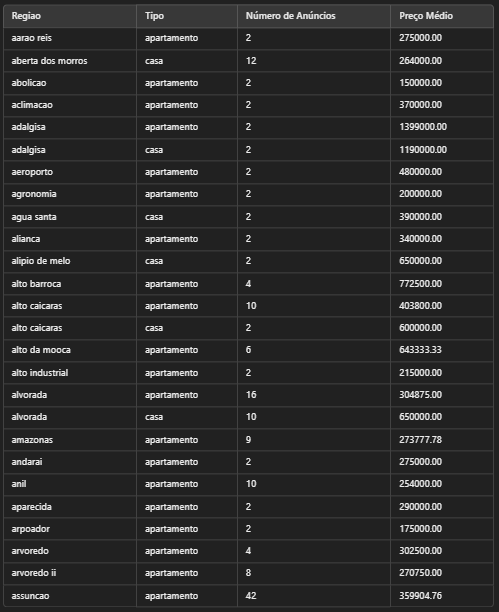

Com esses dados é possível realizar análises sobre os preços médios de imóveis por tipo (apartamento ou casa) e região, bem como identificar a quantidade de anúncios ativos para cada localidade. Isso pode ser útil para entender as dinâmicas do mercado imobiliário local, identificar tendências de preços e avaliar quais regiões têm maior oferta de imóveis. Para um processo de análise mais avançado, é possível usar esses dados para prever tendências de preço ou identificar padrões de demanda.

### Gráficos média de preço por tipo

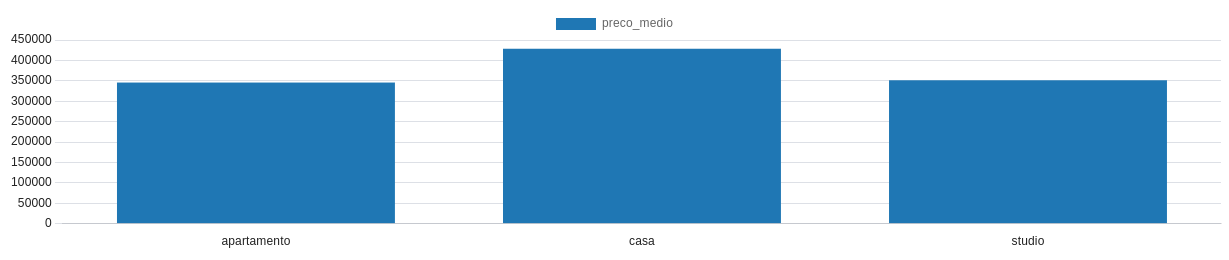

### Conclusões

A principal dificuldade enfrentada pelo projeto foi a impossibilidade de utilizar fontes de dados relevantes, como os websites ImóvelWeb e Viva Real, devido às suas proteções contra web scraping e à ausência de alternativas para acesso aos dados, como APIs públicas. Essa limitação restringiu parcialmente a diversidade de informações disponíveis para análise, exigindo adaptações na estratégia de coleta.

Outro desafio significativo foi o tratamento de valores nulos nos dados, decorrentes da falta de padronização em campos dos anúncios analisados. A remoção de registros incompletos, embora necessária para garantir a consistência do conjunto de dados, reduziu a amostra final. Optou-se por esse método considerando os riscos de distorções analíticas causadas por dados ausentes, ainda que isso implicasse a perda de anúncios com informações parciais relevantes. Entretanto, avalia-se que o volume de dados consolidado mostrou-se adequado para os objetivos propostos neste trabalho.

Com uma base de dados robusta, fontes confiáveis e tratamento criterioso das informações, o Data Warehouse desenvolvido demonstra capacidade para integrar dimensões estratégicas do mercado imobiliário brasileiro, como localização, preços, características dos imóveis e tendências temporais. As consultas realizadas ilustram parte de seu potencial, permitindo desde a identificação de padrões regionais de valorização até a correlação entre infraestrutura urbana e variações de preços. Essa estrutura não apenas facilita análises históricas, mas também serve como base para projeções e tomada de decisão embasada, consolidando-se como uma ferramenta valiosa para gestores, investidores e pesquisadores do setor.

### Backup do esquema do DW : [Backup_DW.sql](https://drive.google.com/drive/u/1/folders/1Z9RPheFLO3to3UpPi0LsvurO7kHPLbeT).


## Fontes:

QuintoAndar. "Abra as portas para um novo morar - QuintoAndar" Acessado em 25 de fevereiro de 2025. https://www.quintoandar.com.br.

SELENIUM. Selenium Python Documentation. 2025. Disponível em: https://www.selenium.dev/documentation/. Acesso em: 25 fev. 2025.


Além disso, foram utilizados os materiais disponibilizados pela professora Sahudy Montenegro Gonzalez na disciplina, tanto sobre DataWarehouse e Web Scraping.